In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
video_info = pd.read_csv("/datasets/cgn/EGOCOM/video_info.csv")

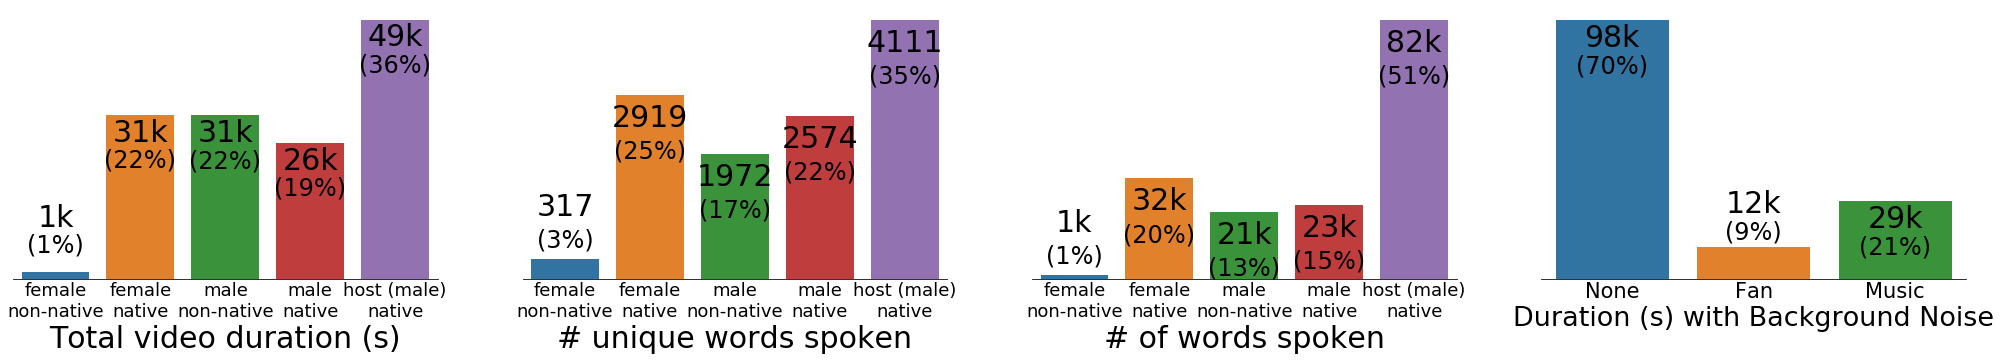

In [104]:
fontsize = 30
plt.figure(figsize=(35,5))

plt.subplot(1, 4, 1)

gender_host = video_info.groupby(['speaker_gender', 'speaker_is_host', "native_speaker"])['duration_seconds'].sum().reset_index()
plot_values = gender_host['duration_seconds'].values
plot_labels = [str(int(round(v / 1000.))) + "k" for v in plot_values]

g=sns.barplot(x=['female\nnon-native','female\nnative','male\nnon-native','male\nnative','host (male)\nnative'],y=plot_values)

for i, v in enumerate(plot_values):
    height = v - 5000 if i > 0 else 10000
    g.text(i, height, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    height = v - 10000 if i > 0 else 5000
    g.text(i, height, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)

    ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('Total video duration (s)', fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .6)
# plt.show()



plt.subplot(1, 4, 2)

unique_words = video_info.groupby(['speaker_gender', 'speaker_is_host', "native_speaker"])['tokenized_words'].apply(lambda x: len({z.lower() for z in " ".join(x).split()})).reset_index()
unique_words.columns = ['speaker_gender', 'speaker_is_host', "native_speaker", 'unique_word_count']

plot_values = unique_words['unique_word_count'].values
plot_labels = [str(round(v / 1000., 1)) + "k" for v in plot_values]
plot_labels = plot_values

g=sns.barplot(x=['female\nnon-native','female\nnative','male\nnon-native','male\nnative','host (male)\nnative'],y=plot_values)

for i, v in enumerate(plot_values):
    height = v - 500 if i > 0 else 1000
    g.text(i, height, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    height = v - 1000 if i > 0 else 500
    g.text(i, height, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)

# for i, v in enumerate(plot_values):
#     g.text(i, v - 1500, "({0:.0%})".format(plot_labels[i] / gender_host['word_count'].iloc[i]), color='black', ha="center", fontsize = fontsize)
    
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('# unique words spoken', fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .6)
# plt.show()


plt.subplot(1, 4, 3)

fontsize = 30

gender_host = video_info.groupby(['speaker_gender', 'speaker_is_host', "native_speaker"])['word_count'].sum().reset_index()
plot_values = gender_host['word_count'].values
plot_labels = [str(int(round(v / 1000.))) + "k" for v in plot_values]

g=sns.barplot(x=['female\nnon-native','female\nnative','male\nnon-native','male\nnative','host (male)\nnative'],y=plot_values)

for i, v in enumerate(plot_values):
    height = v - 10000 if i > 0 else 15000
    g.text(i, height, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    height = v - 20000 if i > 0 else 5000
    g.text(i, height, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('# of words spoken', fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .6)


plt.subplot(1, 4, 4)

fontsize = 30

music_fan = video_info.groupby(['background_music', 'background_fan'])['duration_seconds'].sum().reset_index()
plot_values = music_fan['duration_seconds'].values
plot_labels = [str(int(round(v / 1000.))) + "k" for v in plot_values]

g=sns.barplot(x=['None','Fan','Music'],y=plot_values)

for i, v in enumerate(plot_values):
    height = v - 10000 if i != 1 else 25000
    g.text(i, height, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    height = v - 20000 if i != 1 else 15000
    g.text(i, height, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('Duration (s) with Background Noise', fontsize = fontsize*.9)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .7)
# plt.show()



plt.savefig("img/egocom_stats_gender_native.pdf", dpi=600, pad_inches=0, bbox_inches = 'tight')
plt.show()

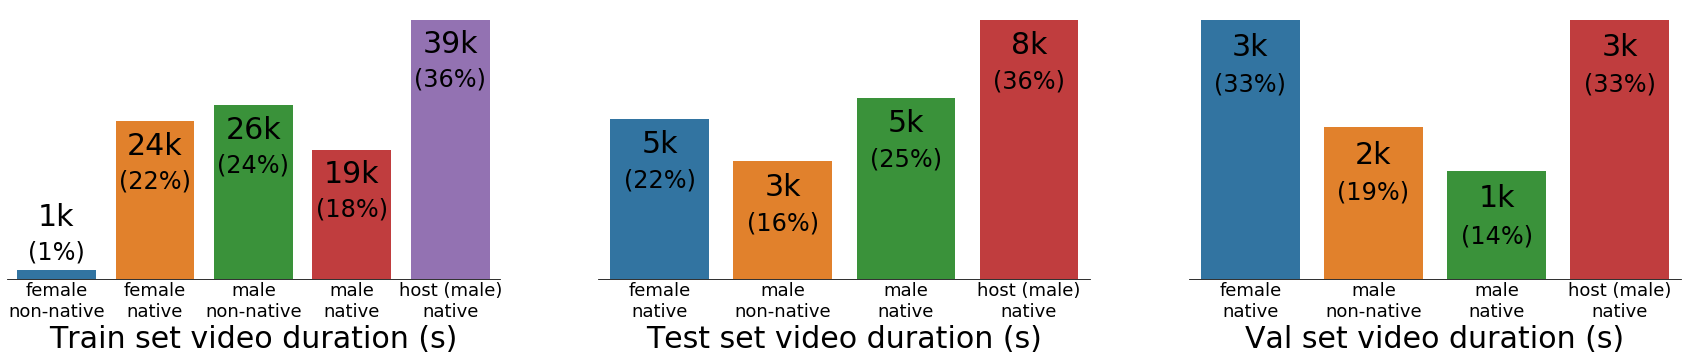

In [105]:
fontsize = 30
plt.figure(figsize=(30,5))

plt.subplot(1, 3, 1)

kind = 'train'

gender_host = video_info[video_info[kind]].groupby(['speaker_gender', 'speaker_is_host', "native_speaker"])['duration_seconds'].sum().reset_index()
plot_values = gender_host['duration_seconds'].values
plot_labels = [str(int(round(v / 1000.))) + "k" for v in plot_values]

g=sns.barplot(x=['female\nnon-native','female\nnative','male\nnon-native','male\nnative','host (male)\nnative'],y=plot_values)

for i, v in enumerate(plot_values):
    height = v - 5000 if i > 0 else 8000
    g.text(i, height, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    height = v - 10000 if i > 0 else 3000
    g.text(i, height, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)

    ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('{} set video duration (s)'.format(kind.capitalize()), fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .6)
# plt.show()



plt.subplot(1, 3, 2)

kind = 'test'

gender_host = video_info[video_info[kind]].groupby(['speaker_gender', 'speaker_is_host', "native_speaker"])['duration_seconds'].sum().reset_index()
plot_values = gender_host['duration_seconds'].values
plot_labels = [str(int(round(v / 1000.))) + "k" for v in plot_values]

g=sns.barplot(x=['female\nnative','male\nnon-native','male\nnative','host (male)\nnative'],y=plot_values)

for i, v in enumerate(plot_values):
    height = v - 1000 
    g.text(i, height, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    height = v - 2000
    g.text(i, height, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)

    ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('{} set video duration (s)'.format(kind.capitalize()), fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .6)
# plt.show()





plt.subplot(1, 3, 3)

kind = 'val'

gender_host = video_info[video_info[kind]].groupby(['speaker_gender', 'speaker_is_host', "native_speaker"])['duration_seconds'].sum().reset_index()
plot_values = gender_host['duration_seconds'].values
plot_labels = [str(int(round(v / 1000.))) + "k" for v in plot_values]

g=sns.barplot(x=['female\nnative','male\nnon-native','male\nnative','host (male)\nnative'],y=plot_values)

for i, v in enumerate(plot_values):
    height = v - 400 
    g.text(i, height, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    height = v - 800
    g.text(i, height, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)

    ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('{} set video duration (s)'.format(kind.capitalize()), fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .6)
# plt.show()



plt.savefig("img/egocom_train_test_gender.pdf", dpi=600, pad_inches=0, bbox_inches = 'tight')
plt.show()

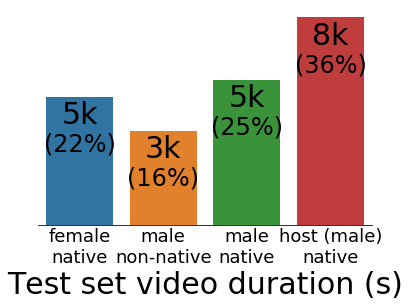

In [62]:
kind = 'test'

gender_host = video_info[video_info[kind]].groupby(['speaker_gender', 'speaker_is_host', "native_speaker"])['duration_seconds'].sum().reset_index()
plot_values = gender_host['duration_seconds'].values
plot_labels = [str(int(round(v / 1000.))) + "k" for v in plot_values]

g=sns.barplot(x=['female\nnative','male\nnon-native','male\nnative','host (male)\nnative'],y=plot_values)

for i, v in enumerate(plot_values):
    height = v - 1000 
    g.text(i, height, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    height = v - 2000
    g.text(i, height, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)

    ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('{} set video duration (s)'.format(kind.capitalize()), fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .6)
# plt.show()

In [65]:
gender_host

,speaker_gender,speaker_is_host,native_speaker,duration_seconds
0,female,False,False,1252
1,female,False,True,23632
2,male,False,False,25996
3,male,False,True,19368
4,male,True,True,38877


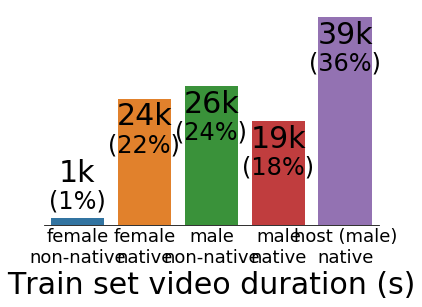

In [79]:
kind = 'train'

gender_host = video_info[video_info[kind]].groupby(['speaker_gender', 'speaker_is_host', "native_speaker"])['duration_seconds'].sum().reset_index()
plot_values = gender_host['duration_seconds'].values
plot_labels = [str(int(round(v / 1000.))) + "k" for v in plot_values]

g=sns.barplot(x=['female\nnon-native','female\nnative','male\nnon-native','male\nnative','host (male)\nnative'],y=plot_values)

for i, v in enumerate(plot_values):
    height = v - 5000 if i > 0 else 8000
    g.text(i, height, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    height = v - 10000 if i > 0 else 3000
    g.text(i, height, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)

    ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('{} set video duration (s)'.format(kind.capitalize()), fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .6)
# plt.show()

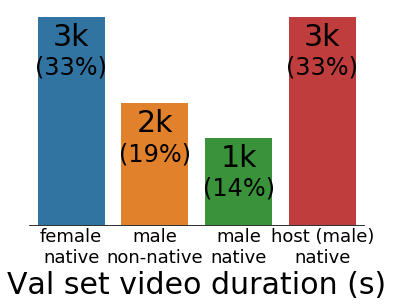

In [87]:
kind = 'val'

gender_host = video_info[video_info[kind]].groupby(['speaker_gender', 'speaker_is_host', "native_speaker"])['duration_seconds'].sum().reset_index()
plot_values = gender_host['duration_seconds'].values
plot_labels = [str(int(round(v / 1000.))) + "k" for v in plot_values]

g=sns.barplot(x=['female\nnative','male\nnon-native','male\nnative','host (male)\nnative'],y=plot_values)

for i, v in enumerate(plot_values):
    height = v - 400 
    g.text(i, height, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    height = v - 800
    g.text(i, height, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)

    ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('{} set video duration (s)'.format(kind.capitalize()), fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .6)
# plt.show()

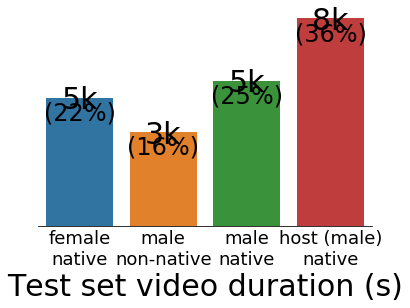

In [100]:
kind = 'test'

gender_host = video_info[video_info[kind]].groupby(['speaker_gender', 'speaker_is_host', "native_speaker"])['duration_seconds'].sum().reset_index()
plot_values = gender_host['duration_seconds'].values
plot_labels = [str(int(round(v / 1000.))) + "k" for v in plot_values]

g=sns.barplot(x=['female\nnative','male\nnon-native','male\nnative','host (male)\nnative'],y=plot_values)

for i, v in enumerate(plot_values):
    height = v - 400 
    g.text(i, height, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    height = v - 800
    g.text(i, height, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)

    ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('{} set video duration (s)'.format(kind.capitalize()), fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .6)
# plt.show()

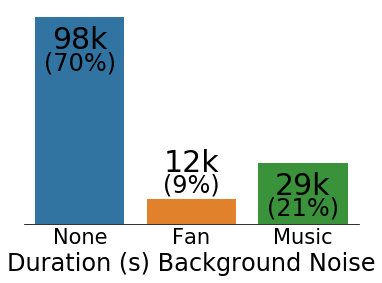

In [50]:
fontsize = 30

music_fan = video_info.groupby(['background_music', 'background_fan'])['duration_seconds'].sum().reset_index()
plot_values = music_fan['duration_seconds'].values
plot_labels = [str(int(round(v / 1000.))) + "k" for v in plot_values]

g=sns.barplot(x=['None','Fan','Music'],y=plot_values)

for i, v in enumerate(plot_values):
    height = v - 15000 if i != 1 else 25000
    g.text(i, height, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    height = v - 25000 if i != 1 else 15000
    g.text(i, height, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('Duration (s) Background Noise', fontsize = fontsize*.8)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .7)
plt.show()

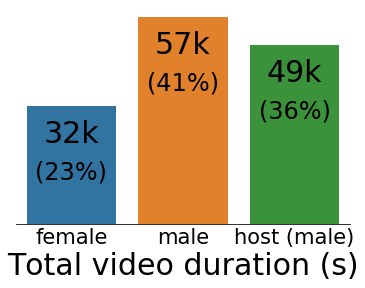

In [18]:
fontsize = 30

gender_host = video_info.groupby(['speaker_gender', 'speaker_is_host'])['duration_seconds'].sum().reset_index()
plot_values = gender_host['duration_seconds'].values
plot_labels = [str(int(round(v / 1000.))) + "k" for v in plot_values]

g=sns.barplot(x=['female','male','host (male)'],y=plot_values)

for i, v in enumerate(plot_values):
    g.text(i, v - 10000, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    g.text(i, v - 20000, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('Total video duration (s)', fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .7)
plt.show()

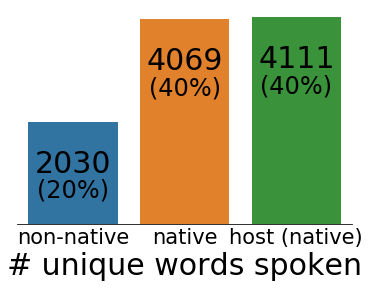

In [241]:
unique_words = video_info.groupby(['native_speaker', 'speaker_is_host'])['tokenized_words'].apply(lambda x: len({z.lower() for z in " ".join(x).split()})).reset_index()
unique_words.columns = ['native_speaker', 'speaker_is_host', 'unique_word_count']


fontsize = 30

plot_values = unique_words['unique_word_count'].values
plot_labels = [str(round(v / 1000., 1)) + "k" for v in plot_values]
plot_labels = plot_values

g=sns.barplot(x=['non-native','native','host (native)'],y=plot_values)

for i, v in enumerate(plot_values):
    g.text(i, v - 1000, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    g.text(i, v - 1500, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)

# for i, v in enumerate(plot_values):
#     g.text(i, v - 1500, "({0:.0%})".format(plot_labels[i] / gender_host['word_count'].iloc[i]), color='black', ha="center", fontsize = fontsize)
    
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('# unique words spoken', fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .7)
plt.show()

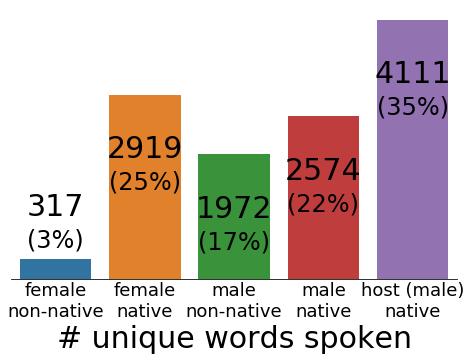

In [267]:
unique_words = video_info.groupby(['speaker_gender', 'speaker_is_host', "native_speaker"])['tokenized_words'].apply(lambda x: len({z.lower() for z in " ".join(x).split()})).reset_index()
unique_words.columns = ['speaker_gender', 'speaker_is_host', "native_speaker", 'unique_word_count']

plt.figure(figsize=(8,5))
fontsize = 30

plot_values = unique_words['unique_word_count'].values
plot_labels = [str(round(v / 1000., 1)) + "k" for v in plot_values]
plot_labels = plot_values

g=sns.barplot(x=['female\nnon-native','female\nnative','male\nnon-native','male\nnative','host (male)\nnative'],y=plot_values)

for i, v in enumerate(plot_values):
    height = v - 1000 if i > 0 else 1000
    g.text(i, height, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    height = v - 1500 if i > 0 else 500
    g.text(i, height, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)

# for i, v in enumerate(plot_values):
#     g.text(i, v - 1500, "({0:.0%})".format(plot_labels[i] / gender_host['word_count'].iloc[i]), color='black', ha="center", fontsize = fontsize)
    
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('# unique words spoken', fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .6)
plt.show()

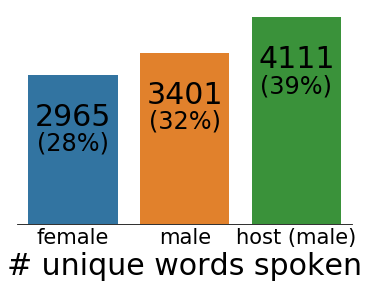

In [242]:
unique_words = video_info.groupby(['speaker_gender', 'speaker_is_host'])['tokenized_words'].apply(lambda x: len({z.lower() for z in " ".join(x).split()})).reset_index()
unique_words.columns = ['speaker_gender', 'speaker_is_host', 'unique_word_count']


fontsize = 30

plot_values = unique_words['unique_word_count'].values
plot_labels = [str(round(v / 1000., 1)) + "k" for v in plot_values]
plot_labels = plot_values

g=sns.barplot(x=['female','male','host (male)'],y=plot_values)

for i, v in enumerate(plot_values):
    g.text(i, v - 1000, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    g.text(i, v - 1500, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)

# for i, v in enumerate(plot_values):
#     g.text(i, v - 1500, "({0:.0%})".format(plot_labels[i] / gender_host['word_count'].iloc[i]), color='black', ha="center", fontsize = fontsize)
    
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('# unique words spoken', fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .7)
plt.show()

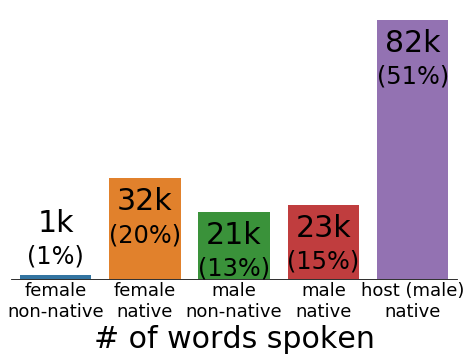

In [280]:
plt.figure(figsize=(8,5))

fontsize = 30

gender_host = video_info.groupby(['speaker_gender', 'speaker_is_host', "native_speaker"])['word_count'].sum().reset_index()
plot_values = gender_host['word_count'].values
plot_labels = [str(int(round(v / 1000.))) + "k" for v in plot_values]

g=sns.barplot(x=['female\nnon-native','female\nnative','male\nnon-native','male\nnative','host (male)\nnative'],y=plot_values)

for i, v in enumerate(plot_values):
    height = v - 10000 if i > 0 else 15000
    g.text(i, height, plot_labels[i], color='black', ha="center", fontsize = fontsize)
for i, v in enumerate(plot_values):
    height = v - 20000 if i > 0 else 5000
    g.text(i, height, "({0:.0%})".format(plot_values[i] / sum(plot_values)), color='black', ha="center", fontsize = fontsize*.8)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("")
ax.set_xlabel('# of words spoken', fontsize = fontsize)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize * .6)
plt.show()